# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для того, чтобы результаты были воспроизводимы в дальнейшем (если генерируются какие-то случайные элементы)")

Для того, чтобы результаты были воспроизводимы в дальнейшем (если генерируются какие-то случайные элементы)


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10, random_state = 42)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
df_train.describe(include=object)

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [8]:
df_train.describe(include=np.number)

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [9]:
df_test.describe(include=object)

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


In [10]:
df_test.describe(include=np.number)

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [11]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

В колонках mileage, engine, max_power, torque, seats.

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [12]:
df_train_subset = df_train.drop(['selling_price'], axis = 1)
df_train_subset.duplicated().sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [13]:
df_train[df_train_subset.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [14]:
df_train = df_train.drop_duplicates(df_train_subset.columns, keep = 'first')

In [15]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [16]:
df_train.reset_index(drop = True, inplace = True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [17]:
df_train['max_power'].unique()

array(['74 bhp', '103.52 bhp', '90 bhp', '88.2 bhp', '81.86 bhp',
       '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp', '108.45 bhp',
       '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp', '46.3 bhp',
       '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp', '83.1 bhp',
       '47.3 bhp', '73.8 bhp', '34.2 bhp', '88.5 bhp', '35 bhp',
       '40.3 bhp', '121.3 bhp', '138.03 bhp', '160.77 bhp', '117.3 bhp',
       '116.3 bhp', '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp',
       '98.63 bhp', '175.56 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '120 bhp', '94.68 bhp', '160 bhp', '155 bhp',
       '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.14 bhp', '83.8 bhp',
       '126.2 bhp', '62.1 bhp', '86.7 bhp', '188 bhp', '214.56 bhp',
       '177 bhp', '148.31 bhp', 

In [18]:
# так как в данных есть значение ' bhp', которое потом не сможет преобразоваться к float, заменим пропуск на 0

df_train.loc[df_train['max_power'] == ' bhp', 'max_power'] = '0 bhp'
df_test.loc[df_test['max_power'] == ' bhp', 'max_power'] = '0 bhp'

In [19]:
df_train['mileage'] = df_train['mileage'].str.strip(' km\/kg| kmpl')
df_train['engine'] = df_train['engine'].str.strip(' CC')
df_train['max_power'] = df_train['max_power'].str.strip(' bhp')

df_test['mileage'] = df_test['mileage'].str.strip(' km\/kg| kmpl')
df_test['engine'] = df_test['engine'].str.strip(' CC')
df_test['max_power'] = df_test['max_power'].str.strip(' bhp')

In [20]:
df_train = df_train.astype({'mileage':'float', 'engine':'float', 'max_power':'float'})
df_test = df_test.astype({'mileage':'float', 'engine':'float', 'max_power':'float'})

In [21]:
df_train.drop(columns=['torque'], inplace=True)
df_test.drop(columns=['torque'], inplace=True)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [22]:
df_train['mileage'].fillna(df_train['mileage'].mean(), inplace = True)
df_train['engine'].fillna(df_train['engine'].mean(), inplace = True)
df_train['max_power'].fillna(df_train['max_power'].mean(), inplace = True)
df_train['seats'].fillna(df_train['seats'].mean(), inplace = True)

df_test['mileage'].fillna(df_train['mileage'].mean(), inplace = True)
df_test['engine'].fillna(df_train['engine'].mean(), inplace = True)
df_test['max_power'].fillna(df_train['max_power'].mean(), inplace = True)
df_test['seats'].fillna(df_train['seats'].mean(), inplace = True)

In [23]:
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [24]:
df_test.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [25]:
df_train = df_train.astype({'engine':'int', 'seats':'int'})
df_test = df_test.astype({'engine':'int', 'seats':'int'})

In [26]:
print("Число сидений в машине принимает ограниченное количество значений,\nпреобразование его к числу может исказить предсказание модели")

Число сидений в машине принимает ограниченное количество значений,
преобразование его к числу может исказить предсказание модели


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

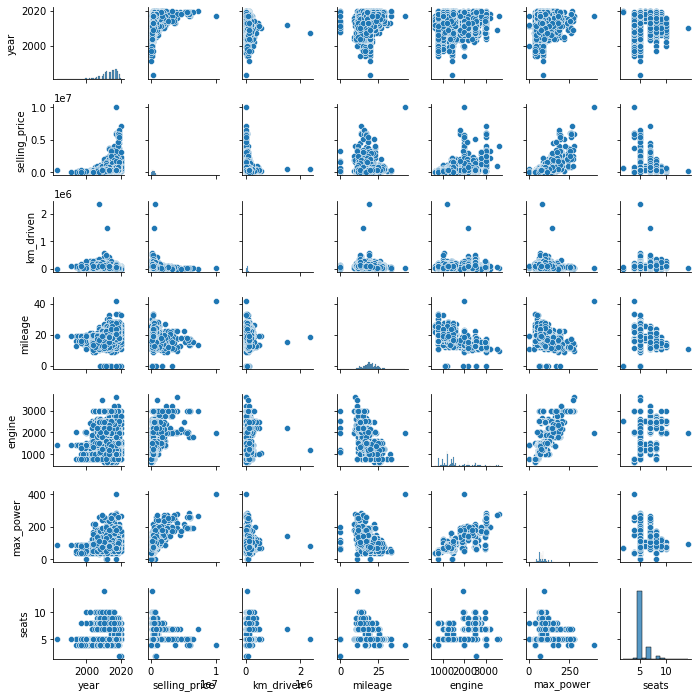

In [27]:
sns.pairplot(df_train, height=1.4)
plt.tight_layout()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Engine и max_power явно положительно скоррелированы между собой, engine и mileage имеют некоторую отрицательную корреляцию. Также положительно связаны целевая переменная selling_price с предикторами max_power, engine и year.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

Совокупности похожи, разницы в графиках обусловлены выбросами в трейне, в тесте судя по графикам рассеяние чуть больше, т.к. нет явных выбросов. 

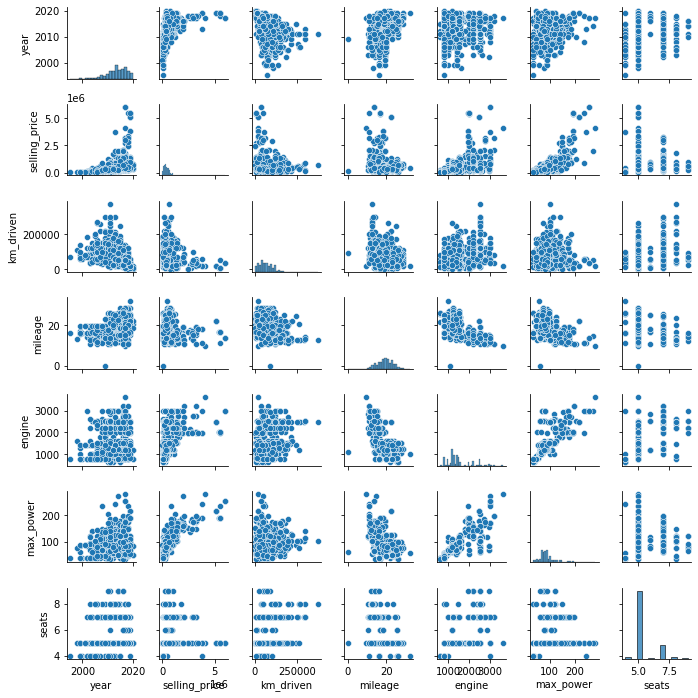

In [28]:
sns.pairplot(df_test, height=1.4)
plt.tight_layout()

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

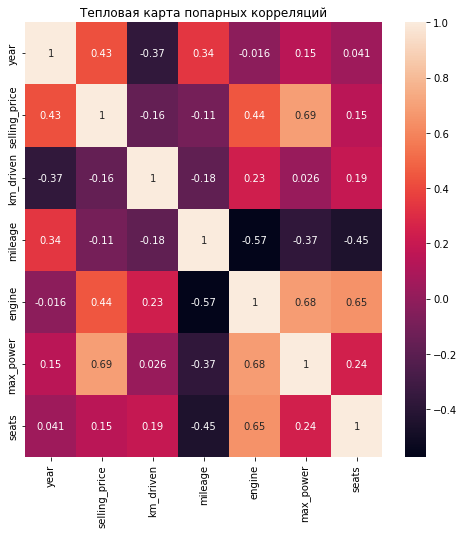

In [29]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_train.corr(), annot=True)
plt.title('Тепловая карта попарных корреляций')
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>

year и engine

* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>

selling_price и max_power, engine и max_power, engine и seats

* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

Можно сказать, что некоторая отрицательная зависимость между этими показателями есть, однако она довольно слабая, поэтому утверждать наверняка не стоит

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

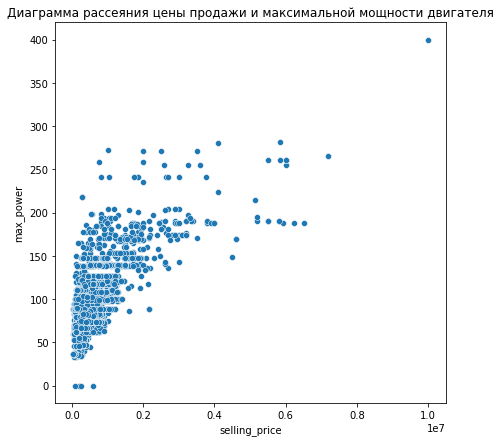

In [30]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_train, x="selling_price", y="max_power")
plt.title('Диаграмма рассеяния цены продажи и максимальной мощности двигателя')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

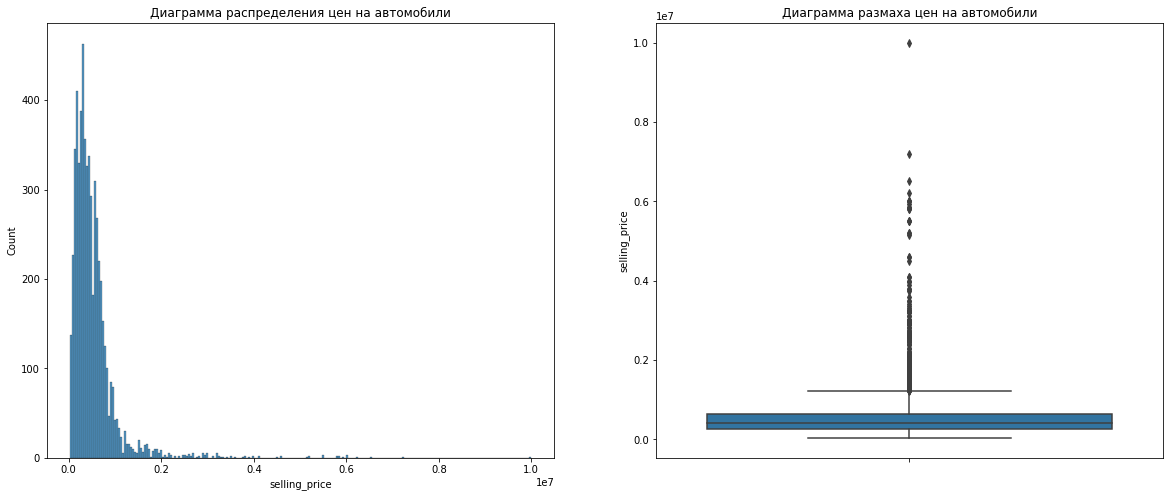

In [31]:
plt.figure(figsize=(20,8))

plt.subplot(121)
plt.title('Диаграмма распределения цен на автомобили')
sns.histplot(df_train['selling_price'])

plt.subplot(122)
plt.title('Диаграмма размаха цен на автомобили')
sns.boxplot(y=df_train['selling_price'])

plt.show()

Как видно, в датасете присутствует достаточно много выбросов, распределение смещено влево, большинство машин имеют цену до 1 млн рублей.

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [32]:
y_train = df_train['selling_price']
X_train = df_train.select_dtypes(exclude=['object']).drop(['selling_price'], axis = 1)

In [33]:
assert X_train.shape == (5840, 6)

In [34]:
X_train

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,5
5836,2013,50000,18.90,998,67.10,5
5837,2013,110000,18.50,1197,82.85,5
5838,2007,119000,16.80,1493,110.00,5


In [35]:
y_test = df_test['selling_price']
X_test = df_test.select_dtypes(exclude=['object']).drop(['selling_price'], axis = 1)

In [36]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train.values, y_train.values)

y_pred = model.predict(X_test.values)
r2_score(y_test.values, y_pred)

0.59326166957722

In [38]:
r2_score(y_train.values, model.predict(X_train.values))

0.5912620260962413

In [39]:
MSE(y_test.values, y_pred)

233804806999.71893

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train.values)

X_train_norm = scaler.transform(X_train.values)
X_test_norm = scaler.transform(X_test.values)

In [41]:
model.fit(X_train_norm, y_train.values)

y_pred = model.predict(X_test_norm)
r2_score(y_test.values, y_pred)

0.5932616695772372

In [42]:
r2_score(y_train.values, model.predict(X_train_norm))

0.5912620260962416

In [43]:
MSE(y_test.values, y_pred)

233804806999.7091

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [44]:
model.coef_

array([157848.76395798, -43480.68397621,  26304.41880564,  60412.81485768,
       320937.16252562, -22258.20556971])

Наиболее информативный признак - max_power

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [45]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()

model_lasso.fit(X_train_norm, y_train.values)

y_pred = model_lasso.predict(X_test_norm)

r2_score(y_test.values, y_pred)

0.5932604999832953

In [46]:
r2_score(y_train.values, model_lasso.predict(X_train_norm))

0.5912620260607873

In [47]:
MSE(y_test.values, y_pred)

233805479315.7054

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [48]:
model_lasso.coef_

array([157848.46814504, -43479.57042957,  26302.58061835,  60407.96990665,
       320938.09186975, -22255.31921838])

Не занулила, т.к. значения предсказываемой переменной очень большие, для зануления нужно большее значение alpha.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [49]:
from sklearn.model_selection import GridSearchCV

params = [{'alpha' : np.arange(0.0001, 0.1001, 0.01)}]

lasso = Lasso()

grid = GridSearchCV(lasso, params, cv = 10, verbose=1)
grid.fit(X_train_norm, y_train.values)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid=[{'alpha': array([0.0001, 0.0101, 0.0201, 0.0301, 0.0401, 0.0501, 0.0601, 0.0701,
       0.0801, 0.0901])}],
             verbose=1)

In [50]:
grid.cv_results_

{'mean_fit_time': array([0.00479701, 0.00340042, 0.00230081, 0.00209916, 0.00209944,
        0.00249865, 0.00240169, 0.00319943, 0.0023999 , 0.00210009]),
 'std_fit_time': array([0.00177813, 0.00102158, 0.00045812, 0.00029934, 0.00029988,
        0.00066973, 0.00048856, 0.00040038, 0.00049029, 0.00029982]),
 'mean_score_time': array([0.00090353, 0.0010998 , 0.00049882, 0.00040052, 0.00020001,
        0.00040047, 0.00069838, 0.00050032, 0.00019987, 0.0004003 ]),
 'std_score_time': array([0.00070344, 0.00030059, 0.00049883, 0.00049053, 0.00040002,
        0.00049048, 0.00045722, 0.00050032, 0.00039973, 0.00049027]),
 'param_alpha': masked_array(data=[0.0001, 0.0101, 0.0201, 0.0301, 0.040100000000000004,
                    0.050100000000000006, 0.0601, 0.07010000000000001,
                    0.0801, 0.0901],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alph

In [51]:
y_pred = grid.predict(X_test_norm)

r2_score(y_test.values, y_pred)

0.5932615642851033

In [52]:
r2_score(y_train.values, grid.predict(X_train_norm))

0.5912620260959538

In [53]:
MSE(y_test.values, y_pred)

233804867524.6343

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

10 моделей

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [54]:
grid.best_estimator_

Lasso(alpha=0.0901)

alpha=0.0901

In [55]:
grid.best_estimator_.coef_

array([157848.73854594, -43480.58338676,  26304.2519409 ,  60412.37884303,
       320937.24550084, -22257.94632366])

Ни один из весов не занулился (они занулятся при значении alpha, близком к 24500)

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [56]:
from sklearn.linear_model import ElasticNet

params = [{'alpha' : np.arange(0.00001, 0.0011, 0.0001)}]

elastic_net = ElasticNet()

grid = GridSearchCV(elastic_net, params, cv = 10, verbose=1)
grid.fit(X_train_norm, y_train.values)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': array([1.00e-05, 1.10e-04, 2.10e-04, 3.10e-04, 4.10e-04, 5.10e-04,
       6.10e-04, 7.10e-04, 8.10e-04, 9.10e-04, 1.01e-03])}],
             verbose=1)

In [57]:
y_pred = grid.predict(X_test_norm)

r2_score(y_test, y_pred)

0.5931512590708244

In [58]:
r2_score(y_train.values, grid.predict(X_train_norm))

0.5912618831006529

In [59]:
MSE(y_test.values, y_pred)

233868274111.63763

In [60]:
grid.best_estimator_

ElasticNet(alpha=0.00101)

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

alpha=0.00101

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [61]:
X_train_cat = df_train.drop(['selling_price', 'name'], axis = 1)
X_test_cat = df_test.drop(['selling_price', 'name'], axis = 1)

In [62]:
assert X_train_cat.shape == (5840, 10)

In [63]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [64]:
X_train_cat['seats'] = X_train_cat['seats'].astype('object')
X_test_cat['seats'] = X_test_cat['seats'].astype('object')

In [65]:
X_train_dum = pd.get_dummies(X_train_cat, drop_first=True)
X_test_dum = pd.get_dummies(X_test_cat, drop_first=True)
print(X_train_dum.shape)

X_train_dum['year'] = X_train_norm.T[0]
X_train_dum['km_driven'] = X_train_norm.T[1]
X_train_dum['mileage'] = X_train_norm.T[2]
X_train_dum['engine'] = X_train_norm.T[3]
X_train_dum['max_power'] = X_train_norm.T[4]

X_test_dum['year'] = X_test_norm.T[0]
X_test_dum['km_driven'] = X_test_norm.T[1]
X_test_dum['mileage'] = X_test_norm.T[2]
X_test_dum['engine'] = X_test_norm.T[3]
X_test_dum['max_power'] = X_test_norm.T[4]

(5840, 23)


C:\Users\Анастасия\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
C:\Users\Анастасия\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [66]:
X_test_dum = X_test_dum.reindex(columns=X_train_dum.columns, fill_value=0)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [67]:
from sklearn.linear_model import Ridge

ridge = Ridge()

params = [{'alpha' : np.arange(0.00001, 0.0011, 0.0001)}]

grid_ridge = GridSearchCV(ridge, params, scoring = 'r2', cv = 10, verbose=1)
grid_ridge.fit(X_train_dum.values, y_train.values)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid=[{'alpha': array([1.00e-05, 1.10e-04, 2.10e-04, 3.10e-04, 4.10e-04, 5.10e-04,
       6.10e-04, 7.10e-04, 8.10e-04, 9.10e-04, 1.01e-03])}],
             scoring='r2', verbose=1)

In [68]:
grid_ridge.best_estimator_

Ridge(alpha=0.00101)

In [69]:
y_pred = grid_ridge.predict(X_test_dum.values)

r2_score(y_test.values, y_pred)

0.6234468575635821

In [70]:
r2_score(y_train.values, grid_ridge.predict(X_train_dum.values))

0.6670887769621845

In [71]:
MSE(y_test.values, y_pred)

216453498987.8435

Качество предсказания улучшилось ощутимо, но всё ещё r2 довольно небольшой.

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [72]:
def business_metrics(y_test, y_pred):
    count = 0
    for i in range(0, len(y_test)):
        if np.absolute((y_pred[i] - y_test[i])/y_test[i]) < 0.1:
            count = count + 1
    return count/len(y_test)

business_metrics(y_test, y_pred)

0.25

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [73]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()

class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

In [74]:
# переобучим модель для нормализации, чтобы не нормализовать параметр seats

scaler.fit(X_train.drop(['seats'], axis = 1))

StandardScaler()

In [75]:
# сохраним параметры модели, модель для нормализации, а также полное число колонок, на которых тренировалась модель

import joblib

joblib.dump(grid_ridge, 'ridge_model.pkl')
print("Model Saved")

joblib.dump(scaler, 'scaler.pkl')
print("Scaler Saved")

joblib.dump(X_train_dum.columns, 'train_columns.pkl')
print("Columns Saved")

Model Saved
Scaler Saved
Columns Saved


In [76]:
# объект для тестирования

item = {
  "name": "Maruti Swift Dzire VDI",
  "year": 2014,
  "selling_price": 450000,
  "km_driven": 145500,
  "fuel": "Diesel",
  "seller_type": "Individual",
  "transmission": "Manual",
  "owner": "First Owner",
  "mileage": "23.4 kmpl",
  "engine": "1248 CC",
  "max_power": "74 bhp",
  "torque": "190Nm@ 2000rpm",
  "seats": 5.0
}

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link